In [15]:
import geopandas as gpd
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from modules.Table import TableUserInferface

In [16]:
tui_actual = TableUserInferface()
tui_actual.calc_heatmaps_kpis()

Generating contraction hierarchies with 16 threads.
Setting CH node vector of size 35999
Setting CH edge vector of size 79728
Range graph removed 79728 edges of 159456
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [19]:
gdf = tui_actual.heat_maps['land_uses_diversity']

In [21]:
gdf.to_file('/app/data/export_as_shape/land_uses/actual')

(3134, 5)
(3163, 5)


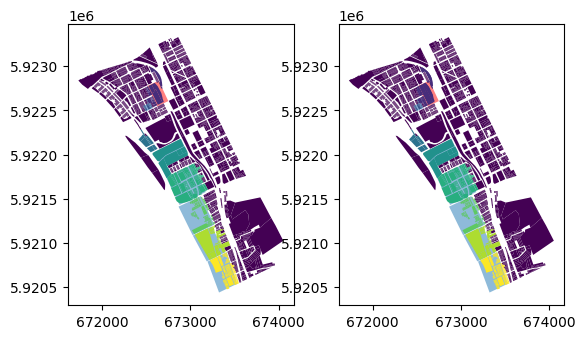

In [32]:
def get_changes_data(tui, mode, plate_id, scenario_id):
    output_data = {}
    if mode=='am':
        output_data['actual'] = tui.am.get_current_amenities()
        tui.am._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.am.get_current_amenities()
    elif mode=='bk':
        output_data['actual'] = tui.bk.get_current_scenario()
        tui.bk._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.bk.get_current_scenario()
    elif mode=='bl':
        output_data['actual'] = tui.bl.get_current_scenario()
        tui.bl._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.bl.get_current_scenario()
    elif mode=='ga':
        output_data['actual'] = tui.ga.get_green_areas()
        tui.ga._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.ga.get_green_areas()
    elif mode=='lu':
        output_data['actual'] = tui.lu.get_current_land_uses()
        tui.lu._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.lu.get_current_land_uses()
    return output_data

mode = 'lu'
sel_plate = 1
scenario_id = 1

changed_data = get_changes_data(tui_actual, mode, sel_plate, scenario_id)

# tui_actual.am.get_current_amenities()
fig, ax = plt.subplots(1,2)
for idx, plate in tui_actual.plates.items():
    if idx!=sel_plate:
        plate.plot(ax=ax[0], alpha=0.5)
    else:
        plate.plot(ax=ax[0], alpha=0.5, color='red')
data = changed_data['actual']
gpd.sjoin(data, tui_actual.area_scope).plot(ax=ax[0], column='plate_id', markersize=10)
print(data.shape)

for idx, plate in tui_actual.plates.items():
    if idx!=sel_plate:
        plate.plot(ax=ax[1], alpha=0.5)
    else:
        plate.plot(ax=ax[1], alpha=0.5, color='red')

data = changed_data['update']
gpd.sjoin(data, tui_actual.area_scope).plot(ax=ax[1], column='plate_id', markersize=10)
print(data.shape)

In [3]:
plate_id = 7
scenario_id = 1
tui_actual.update_plate_status(plate_id=plate_id, scenario_id=scenario_id)

In [4]:
plate_id = 5
scenario_id = 1
tui_actual.update_plate_status(plate_id=plate_id, scenario_id=scenario_id)

In [7]:
tui_actual.st.plate_states

{1: 0, 2: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0}

In [11]:
tui_actual.update_plate_status(7, 0)

In [13]:
nodes, edges = tui_actual.st.get_current_nodes_and_edges()

<Axes: >

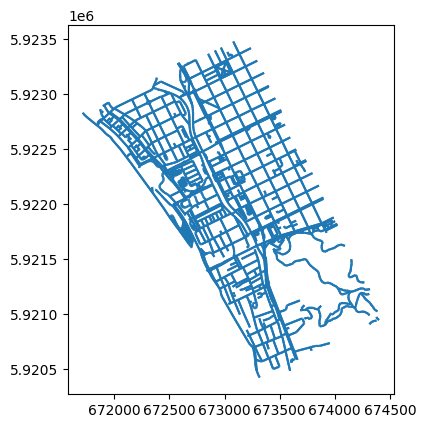

In [14]:
gpd.sjoin(edges, tui_actual.area_scope).plot()

In [23]:
area = tui_actual.area_scope

In [ ]:
anodes = gpd.read_file('/app/data/calles_etiquetadas/streets/streets/actual/nodes')
aedges = gpd.read_file('/app/data/calles_etiquetadas/streets/streets/actual/edges')
fnodes = gpd.read_file('/app/data/calles_etiquetadas/streets/streets/future/nodes')
fedges = gpd.read_file('/app/data/calles_etiquetadas/streets/streets/future/edges')
anodes['x'] = anodes['geometry'].x
anodes['y'] = anodes['geometry'].y
fnodes['x'] = fnodes['geometry'].x
fnodes['y'] = fnodes['geometry'].y
aedges['from'] = aedges['u']
aedges['to'] = aedges['v']
edges_cols = ['u', 'v', 'key', 'from', 'to', 'osmid', 'length', 'plate_id', 'geometry']
aedges = aedges[edges_cols]
fedges = fedges[edges_cols]
fedges['plate_id'].fillna(0, inplace=True)

<Axes: >

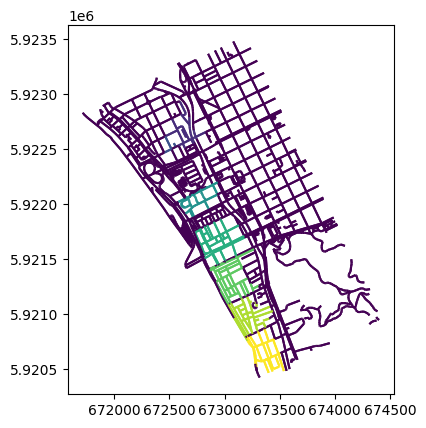

In [59]:
gpd.sjoin(fedges, area).plot(column='plate_id', markersize=5)

In [8]:
import geopandas as gpd
import glob
import os
def load_plates():
    default_crs = 32718
    plates_path = '/app/assets/plates'
    plates_files = glob.glob(os.path.join(plates_path, '*'))
    plates = {}
    num_plates = 0
    for file in plates_files:
        idx = os.path.split(file)[-1]
        if not idx.isdigit():
        # Verifica si el nombre del archivo es un plate con numero
            continue
        else:
        # Convierte idx en un entero antes de agregarlo al diccionario
            idx = int(idx)
            plate = gpd.read_file(file).to_crs(default_crs)
            plates[idx] = plate
            num_plates += 1
    return num_plates, plates

In [9]:
num_plates, plates = load_plates()

In [15]:
from modules.Base import BaseModule

mod = BaseModule()

In [19]:
mod.plate_states[2]=1
mod.plate_states[6]=1

In [24]:
plate_state = mod.plate_states

def valid_plates_street_state():
    lower_plate = 6
    for key, value in plate_state.items():
        if key >= lower_plate and value == 1:
            return 1
    return 0

valid_plates_street_state()

1

In [1]:
import geopandas as gpd

<Axes: >

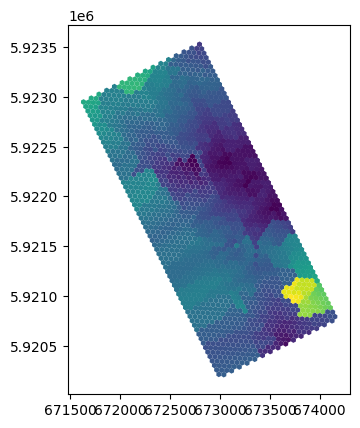

In [7]:
gpd.read_parquet('/app/export/0000011/aprovisionamiento_proximity.parquet').plot(column='travel_time')

<Axes: >

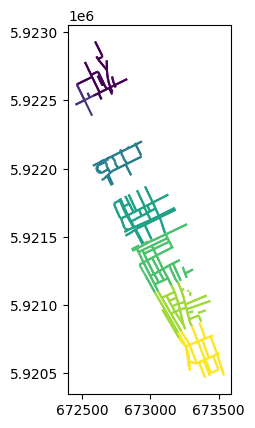

In [31]:
fedges.plot(column='plate_id', markersize=5)

In [16]:
keyword = 'proximity'
filtered_keys = [clave for clave in tui_actual.heat_maps.keys() if keyword in clave]
filtered_keys

['aprovisionamiento_proximity',
 'comercio_y_servicios_proximity',
 'cuidados_proximity',
 'cultura_proximity',
 'educacion_proximity',
 'entretenimiento_proximity',
 'parque_proximity',
 'plaza_proximity']

In [14]:
heatmaps = tui_actual.heat_maps

In [ ]:
################################################################
# Hacer el join entre tiempos de viaje y personas por hexagono.
# Sacar cantidad de personas a X minutos de distancia

In [33]:
gdf = heatmaps['parque_proximity']
gdf.head(3)

,index,hex_id,source,ID_AV,destination,path_lengths,class,travel_time,geometry
0,0,1.0,4187798589,PK21,7851294529,314.708,PK,4.196107,"POLYGON ((671605.227 5922933.825, 671607.021 5..."
1,2,2.0,4187798638,PK21,7851294529,271.330,PK,3.617733,"POLYGON ((671627.487 5922889.053, 671629.281 5..."
2,4,3.0,4187798629,PK21,7851294529,221.890,PK,2.958533,"POLYGON ((671649.747 5922844.282, 671651.542 5..."


In [32]:
green_areas = tui_actual.ga.get_green_areas()
green_areas.head(3)

,TIPO_EP,ID_AV,ID_PLACA,geometry
0,PARQUE,PK1,0.0,"POLYGON Z ((673997.138 5921797.335 0.000, 6744..."
1,PLAZA,SQ2,0.0,"POLYGON Z ((672967.919 5923143.259 0.000, 6729..."
2,PLAZA,SQ3,0.0,"POLYGON Z ((673176.269 5922221.579 0.000, 6731..."


In [31]:
ppl = tui_actual.population_by_unit
ppl.head(3)

,hex_id,population,geometry
0,69.0,1.149191,"POLYGON ((671699.651 5922841.174, 671701.445 5..."
1,70.0,1.984826,"POLYGON ((671721.911 5922796.403, 671723.705 5..."
2,136.0,8.522388,"POLYGON ((671749.554 5922838.066, 671751.348 5..."


In [37]:
merge_gdf = pd.merge(gdf[['hex_id', 'ID_AV']], ppl[['hex_id', 'population']], on='hex_id')

In [44]:
group_df = merge_gdf.groupby(['ID_AV'])['population'].agg('sum').reset_index()

<Axes: >

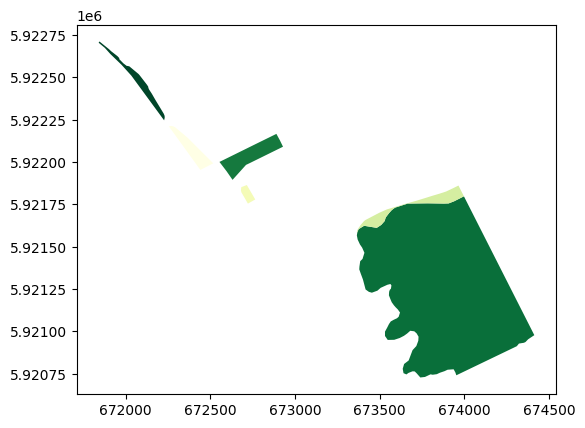

In [58]:
pd.merge(green_areas, group_df, on='ID_AV').plot(column='population', cmap='YlGn')

<Axes: >

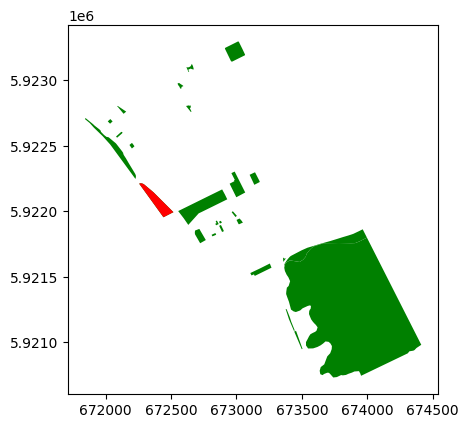

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
green_areas.plot(ax=ax, color='green')
green_areas[green_areas['ID_AV']=='PK20'].plot(ax=ax, color='red')

In [7]:
tui_futuro = TableUserInferface()
tui_futuro.change_scenario(1)
tui_futuro.calc_heatmaps_kpis()

Generating contraction hierarchies with 16 threads.
Setting CH node vector of size 35999
Setting CH edge vector of size 79728
Range graph removed 79728 edges of 159456
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
Generating contraction hierarchies with 16 threads.
Setting CH node vector of size 36891
Setting CH edge vector of size 81446
Range graph removed 81446 edges of 162892
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


<Axes: >

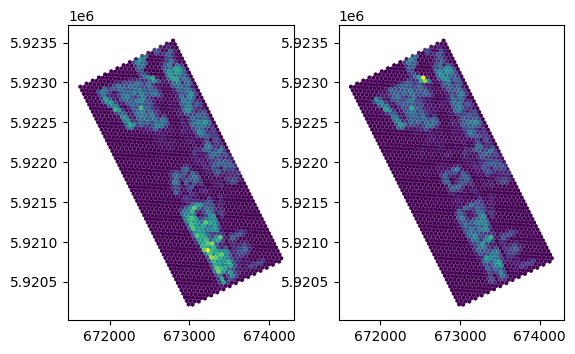

In [4]:
fig, ax = plt.subplots(1,2)
tui_actual.heat_maps['building_density'].plot(column='density', ax=ax[0])
tui_futuro.heat_maps['building_density'].plot(column='density', ax=ax[1])

<Axes: >

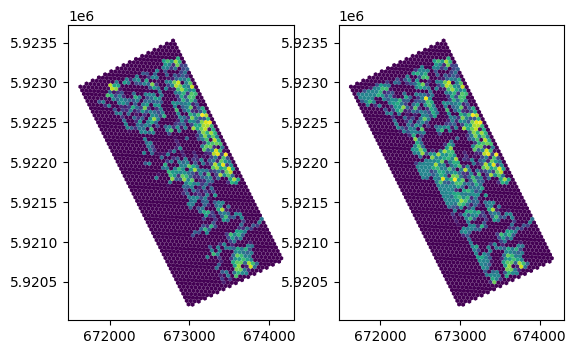

In [5]:
fig, ax = plt.subplots(1,2)
tui_actual.heat_maps['land_uses_diversity'].plot(column='diversity', ax=ax[0])
tui_futuro.heat_maps['land_uses_diversity'].plot(column='diversity', ax=ax[1])

<Axes: >

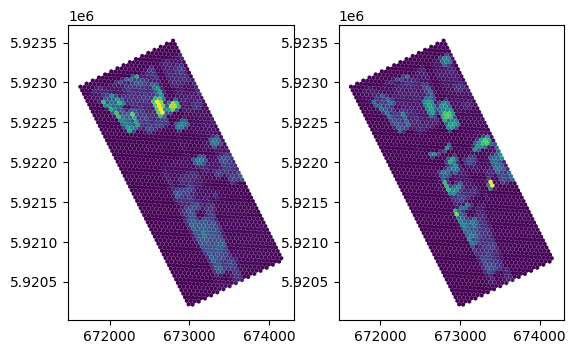

In [16]:
fig, ax = plt.subplots(1,2)
tui_actual.heat_maps['population_density'].plot(column='density', ax=ax[0])
tui_futuro.heat_maps['population_density'].plot(column='density', ax=ax[1])

In [12]:
lu_actual = tui_actual.heat_maps['land_uses_diversity']
lu_futuro = tui_futuro.heat_maps['land_uses_diversity']
print('Diversidad de Usos de Suelo promedio actual')
print(lu_actual.loc[lu_actual['diversity'] > 0, 'diversity'].mean())
print()
print('Diversidad de Usos de Suelo promedio futuro')
print(lu_futuro.loc[lu_futuro['diversity'] > 0, 'diversity'].mean())

Diversidad de Usos de Suelo promedio actual
0.5910384280638403

Diversidad de Usos de Suelo promedio futuro
0.6410302261882567


In [14]:
bd_actual = tui_actual.heat_maps['building_density']
bd_futuro = tui_futuro.heat_maps['building_density']

print('Densidad de construcciones promedio actual')
print(bd_actual.loc[bd_actual['density'] > 0, 'density'].mean())
print()
print('Densidad de construcciones promedio futuro')
print(bd_futuro.loc[bd_futuro['density'] > 0, 'density'].mean())

Densidad de construcciones promedio actual
9.656118143459915

Densidad de construcciones promedio futuro
8.423529411764706


In [21]:
pd_actual = tui_actual.heat_maps['population_density']
pd_futuro = tui_futuro.heat_maps['population_density']

print('Densidad de población promedio actual')
print(pd_actual.loc[pd_actual['density'] > 0, 'density'].mean())
print()
print('Densidad de población promedio futuro')
print(pd_futuro.loc[pd_futuro['density'] > 0, 'density'].mean())

Densidad de población promedio actual
0.009101733645481735

Densidad de población promedio futuro
0.021744069291504103


In [11]:
tui_actual.save_heatmaps()
tui_futuro.save_heatmaps()

Directorio '/app/data/output/actual' creado con éxito.
Directorio '/app/data/output/future' creado con éxito.
